In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Zomato data .csv')

In [5]:
df.sample(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
75,Om Sri Vinayaka Chats,No,No,3.6/5,0,500,Dining
83,Vaishali Deluxe,No,No,3.8/5,42,700,Dining
76,Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1/5,558,150,Dining
56,Banashankari Donne Biriyani,Yes,No,3.8/5,104,300,Dining
80,Kadalu Sea Food Restaurant,Yes,No,3.8/5,153,500,Dining
61,Goa 0 Km,Yes,Yes,3.6/5,163,800,Dining
117,Kulfi & More,No,No,3.4/5,0,150,Dining
13,Caf-Eleven,No,No,4.0/5,424,450,Cafes
125,Soms Kitchen & Bakes,No,No,2.9/5,0,400,Dining
105,Cakes & Slices,No,No,3.5/5,13,300,Dining


In [6]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [11]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Q1. What type of resturant do the majority of customers order from?

Text(0.5, 0, 'Type of Resturant')

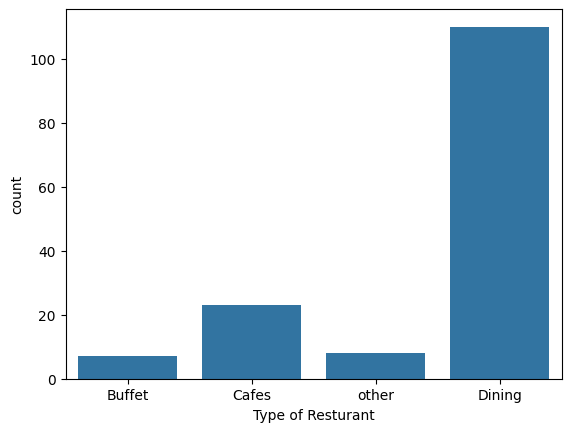

In [9]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Resturant")


Q2. How many votes has each type of restaurant received from customers?

<Axes: xlabel='listed_in(type)', ylabel='votes'>

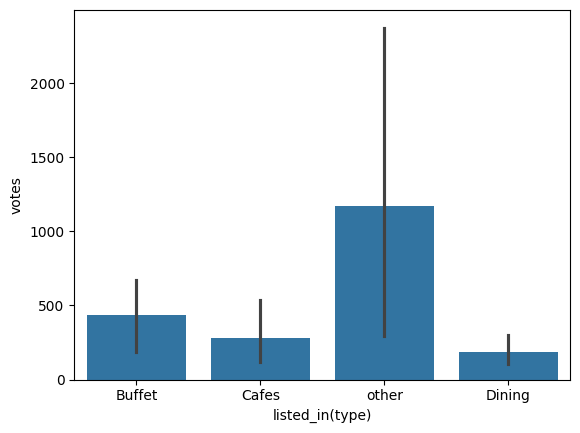

In [15]:
sns.barplot(data=df, y='votes', x='listed_in(type)')

Text(0, 0.5, 'Votes ')

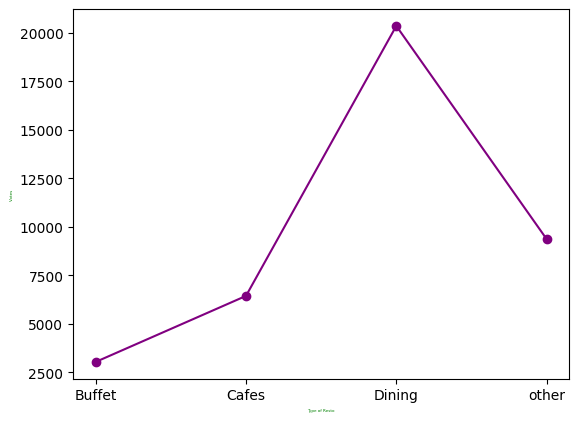

In [22]:
group_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':group_data})
plt.plot(result,c="purple",marker="o")
plt.xlabel("Type of Resto ",c="green",size=3)
plt.ylabel("Votes ",c="green",size=3)


Q3. What are the ratings that the majority of resturants have received?

Text(0, 0.5, 'Frequency')

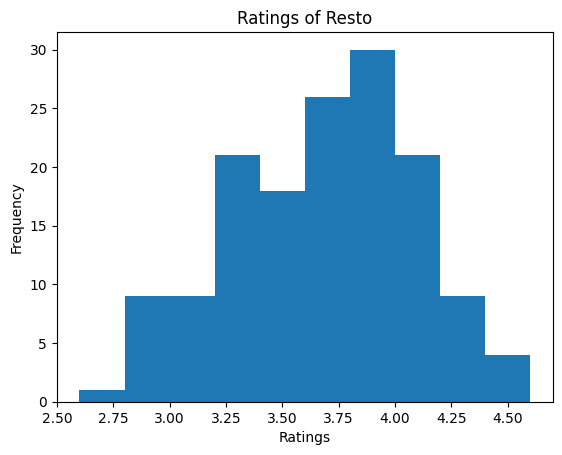

In [27]:
plt.hist(df['rate'],bins=10)
plt.title("Ratings of Resto")
plt.xlabel("Ratings")
plt.ylabel("Frequency")

Q4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

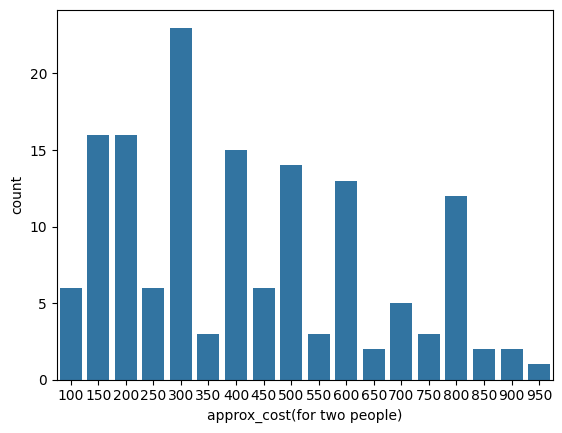

In [29]:
couple_data =df['approx_cost(for two people)']
sns.countplot(x=couple_data)

Q5. Which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

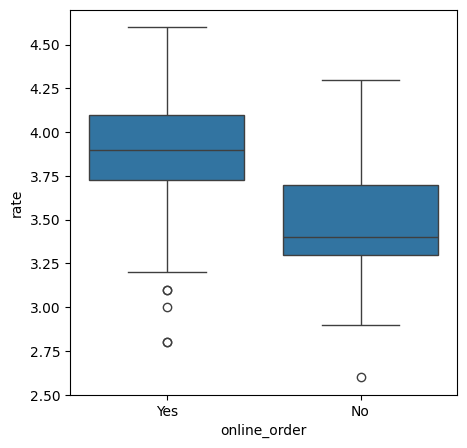

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(x='online_order',y='rate',data=df)

Q6. Which type of restaurant received more offline orders, so that Zomato can customers with some good offers?

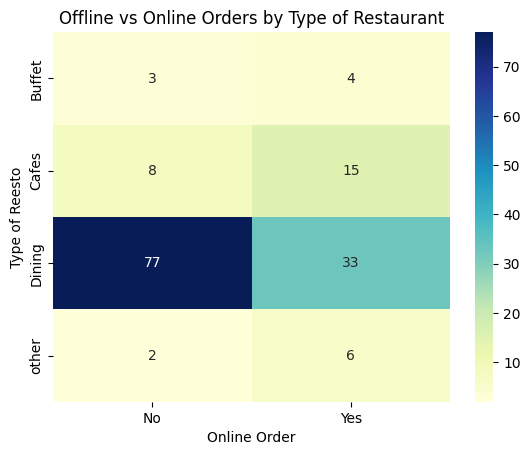

In [35]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title('Offline vs Online Orders by Type of Restaurant')
plt.xlabel("Online Order")
plt.ylabel("Type of Reesto")
plt.show()